In [2]:
import sys
sys.path.append("..")
from library import *

In [3]:
def get_rand_hermitian(n):
    shape = (n, n)
    U = np.random.uniform(-1, 1, shape) + 1.j * np.random.uniform(-1, 1, shape)
    return np.tril(U, -1) + np.tril(U, -1).conj().T + np.diag(np.random.uniform(-1, 1, n))

def get_image_data(ham, m_values, tau_values):
    data = np.zeros(shape=(len(m_values), len(tau_values)))
    for itau, tau in enumerate(tau_values):
        ite = get_ite(ham, tau)
        for im, m in enumerate(m_values):
            strott = get_trotter_S(ham, tau, m)
            fid = get_fidelity(ite, strott)

            error = 1 - fid
            data[len(m_values) - 1 - im, itau] = error
        print(f"Step {itau+1}/{len(tau_values)} done!")
    return data

In [4]:
ham = get_rand_hermitian(n=64)
ham_norm = get_matrix_norm(ham)  # just the biggest eigenvalue (in absolute value)

m_values = np.linspace(1, 10, 100)
tau_values = np.linspace(1/100, 15 / ham_norm, 100)
print(m_values[-1], tau_values[-1] * ham_norm)

data1 = get_image_data(ham, m_values, tau_values)

10.0 15.0
Step 1/100 done!
Step 2/100 done!
Step 3/100 done!
Step 4/100 done!
Step 5/100 done!
Step 6/100 done!
Step 7/100 done!
Step 8/100 done!
Step 9/100 done!
Step 10/100 done!
Step 11/100 done!
Step 12/100 done!
Step 13/100 done!
Step 14/100 done!
Step 15/100 done!
Step 16/100 done!
Step 17/100 done!
Step 18/100 done!
Step 19/100 done!
Step 20/100 done!
Step 21/100 done!
Step 22/100 done!
Step 23/100 done!
Step 24/100 done!
Step 25/100 done!
Step 26/100 done!
Step 27/100 done!
Step 28/100 done!
Step 29/100 done!
Step 30/100 done!
Step 31/100 done!
Step 32/100 done!
Step 33/100 done!
Step 34/100 done!
Step 35/100 done!
Step 36/100 done!
Step 37/100 done!
Step 38/100 done!
Step 39/100 done!
Step 40/100 done!
Step 41/100 done!
Step 42/100 done!
Step 43/100 done!
Step 44/100 done!
Step 45/100 done!
Step 46/100 done!
Step 47/100 done!
Step 48/100 done!
Step 49/100 done!
Step 50/100 done!
Step 51/100 done!
Step 52/100 done!
Step 53/100 done!
Step 54/100 done!
Step 55/100 done!
Step 56/1

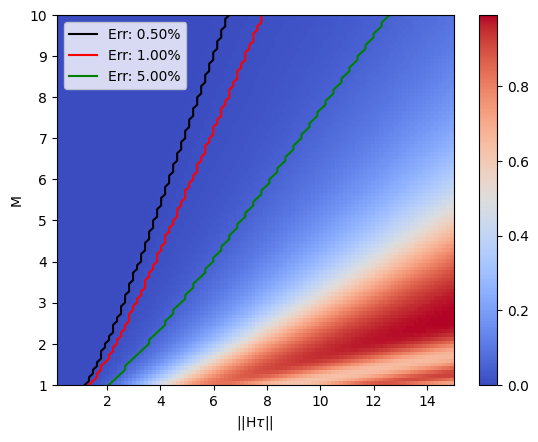

In [5]:
extent = [tau_values[0]*ham_norm, tau_values[-1]*ham_norm, m_values[0], m_values[-1]]
fig, ax = plt.subplots()
im = ax.imshow(data1, interpolation='nearest', extent=extent, aspect="auto", cmap='coolwarm')
cbar = fig.colorbar(im, ax=ax)

thresholds = [0.005, 0.01, 0.05]
colors = ["black", "red", "green"]

for i, th in enumerate(thresholds):
    indexes = np.argmax(data1 > th, axis=1)
    mask = indexes == 0
    indexes = np.delete(indexes, mask)
    plt.plot(tau_values[indexes]*ham_norm, m_values[::-1][~mask], color=colors[i], label=f"Err: {th*100:.2f}%")

plt.xlabel(r"||H$\tau$||")
plt.ylabel("M")
plt.legend(loc="upper left")
# plt.title("Error between imaginary-time operator\n and circuit-simulated operator on a random H");
plt.savefig("fig2_notitle.svg")

In [114]:
ham = H2QCircuit.get_hamilt_op(n=2, radius=0.45).to_matrix()
ham_norm = get_matrix_norm(ham)  # just the biggest eigenvalue (in absolute value)

m_values = np.linspace(1, 10, 100)
tau_values = np.linspace(1/100, 15 / ham_norm, 100)
print(m_values[-1], tau_values[-1] * ham_norm, ham_norm)

data_h2 = get_image_data(ham, m_values, tau_values)

10.0 15.000000000000002 1.558948602334919
Step 1/100 done!
Step 2/100 done!
Step 3/100 done!
Step 4/100 done!
Step 5/100 done!
Step 6/100 done!
Step 7/100 done!
Step 8/100 done!
Step 9/100 done!
Step 10/100 done!
Step 11/100 done!
Step 12/100 done!
Step 13/100 done!
Step 14/100 done!
Step 15/100 done!
Step 16/100 done!
Step 17/100 done!
Step 18/100 done!
Step 19/100 done!
Step 20/100 done!
Step 21/100 done!
Step 22/100 done!
Step 23/100 done!
Step 24/100 done!
Step 25/100 done!
Step 26/100 done!
Step 27/100 done!
Step 28/100 done!
Step 29/100 done!
Step 30/100 done!
Step 31/100 done!
Step 32/100 done!
Step 33/100 done!
Step 34/100 done!
Step 35/100 done!
Step 36/100 done!
Step 37/100 done!
Step 38/100 done!
Step 39/100 done!
Step 40/100 done!
Step 41/100 done!
Step 42/100 done!
Step 43/100 done!
Step 44/100 done!
Step 45/100 done!
Step 46/100 done!
Step 47/100 done!
Step 48/100 done!
Step 49/100 done!
Step 50/100 done!
Step 51/100 done!
Step 52/100 done!
Step 53/100 done!
Step 54/100 d

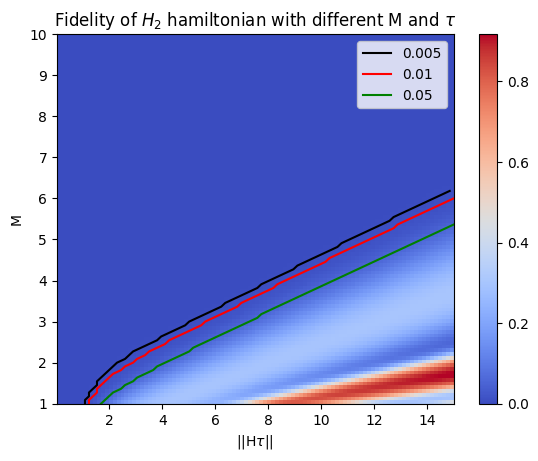

In [127]:
extent = [tau_values[0]*ham_norm, tau_values[-1]*ham_norm, m_values[0], m_values[-1]]
fig, ax = plt.subplots()
im = ax.imshow(data_h2, interpolation='nearest', extent=extent, aspect="auto", cmap='coolwarm')
cbar = fig.colorbar(im, ax=ax)

thresholds = [0.005, 0.01, 0.05]
colors = ["black", "red", "green"]

for i, th in enumerate(thresholds):
    indexes = np.argmax(data_h2 > th, axis=1)
    mask = indexes == 0
    indexes = np.delete(indexes, mask)
    plt.plot(tau_values[indexes]*ham_norm, m_values[::-1][~mask], color=colors[i], label=str(th))

plt.xlabel(r"||H$\tau$||")
plt.ylabel("M")
plt.legend()
plt.title(r"Fidelity of $H_{2}$ hamiltonian with different M and $\tau$");
# plt.plot(np.arange(1, 10), np.arange(1, 19, 2))

In [123]:
print(indexes)
np.delete(indexes, indexes == 0)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 98 96 94 92 90 88
 86 84 83 81 79 77 75 73 71 70 68 66 64 62 60 59 57 55 53 51 50 48 46 44
 42 41 39 37 35 33 32 30 28 26 25 23 21 19 18 17 15 14 13 12 11 10 10  9
  8  8  7  7]


array([98, 96, 94, 92, 90, 88, 86, 84, 83, 81, 79, 77, 75, 73, 71, 70, 68,
       66, 64, 62, 60, 59, 57, 55, 53, 51, 50, 48, 46, 44, 42, 41, 39, 37,
       35, 33, 32, 30, 28, 26, 25, 23, 21, 19, 18, 17, 15, 14, 13, 12, 11,
       10, 10,  9,  8,  8,  7,  7], dtype=int64)

In [132]:
h2qc

NameError: name 'h2qc' is not defined